# Data Esploration
---

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [12]:
#Source Directory
dirDataset = './AudioDataset/'

dir_list = os.listdir(dirDataset)
#dir_list = dir_list[0:5]


#Explore dataset Balance and build the DataFrame
path = []
emotion = []
fname = []
for file in glob.glob("*.txt"):
    fname.append(file)

for i in dir_list:
    if i[6:8]=='01':
        emotion.append('neutral')
    elif i[6:8]=='02':
        emotion.append('calm')
    elif i[6:8]=='03':
        emotion.append('happy')
    elif i[6:8]=='04':
        emotion.append('sad')
    elif i[6:8]=='05':
        emotion.append('angry')
    elif i[6:8]=='06':
        emotion.append('fearful')
    elif i[6:8]=='07':
        emotion.append('disgust')
    elif i[6:8]=='08':
        emotion.append('surprise')
    else:
        emotion.append('undefined') 

    path.append(dirDataset + i)


df = pd.DataFrame(emotion, columns = ['label'])
df = pd.concat([df, pd.DataFrame(path, columns = ['path'])], axis = 1)
df = pd.concat([df, pd.DataFrame(dir_list., columns = ['fname'])], axis = 1)

#df = df[(df['label']=='sad')][:5]

df.label.value_counts()
df.to_csv(os.path.join('./',"ReferenceData.csv"), index = False)
df.to_csv(index=False)
df.head()

,label,path
0,fearful,./AudioDataset/03-01-06-01-02-02-02.wav
1,angry,./AudioDataset/03-01-05-01-02-01-16.wav
2,surprise,./AudioDataset/03-01-08-01-01-01-14.wav
3,fearful,./AudioDataset/03-01-06-01-02-02-16.wav
4,angry,./AudioDataset/03-01-05-01-02-01-02.wav


Considering the spread of the emotions features the datset is really balanced

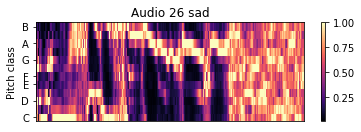

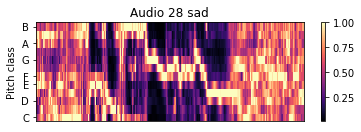

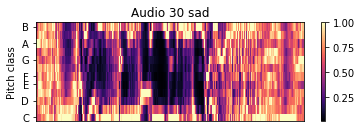

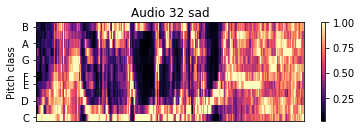

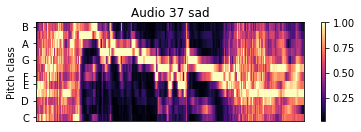

In [4]:
for index, row in df.iterrows():
    y, sample_rate = librosa.load(row['path'], res_type='kaiser_best',sr=22050*2,offset=0.5)
    chroma_cens = librosa.feature.chroma_cens(y=y, sr=sample_rate)
    chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sample_rate)

    plt.figure()
    plt.subplot(2,1,1)
    librosa.display.specshow(chroma_cq, y_axis='chroma')
    plt.title('Audio '+ str(index) + ' ' + row['label'])
    plt.colorbar()

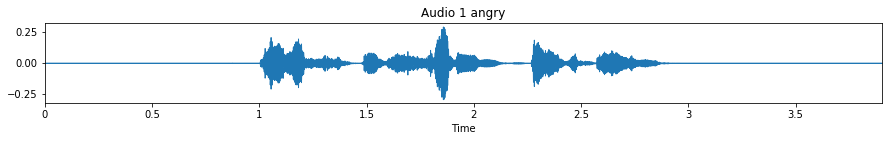

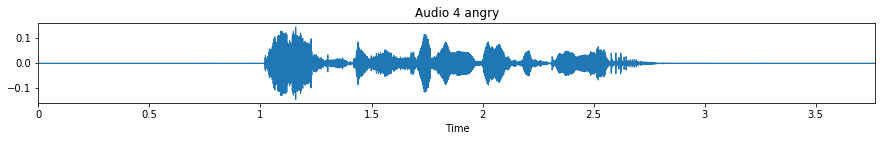

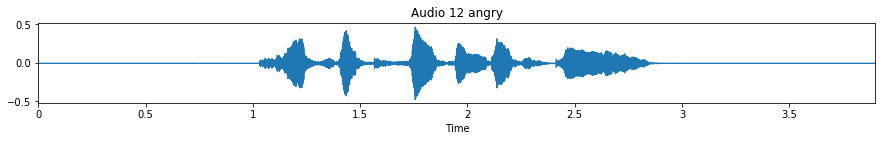

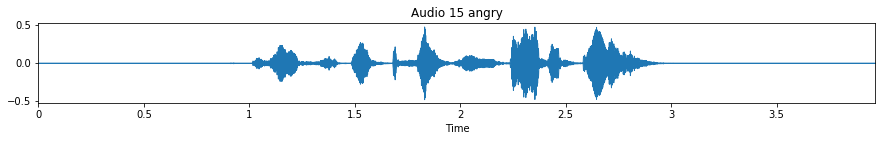

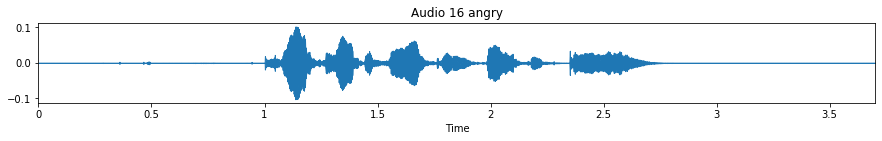

In [3]:
#Look at the wave form
for index, row in df.iterrows():

    # display Audio Wave 
    fname = row['path']
    data, sampling_rate = librosa.load(fname)
    plt.figure(figsize=(15, 5))
    graph = plt.subplot(3, 1, 1)
    graph.set_title('Audio '+ str(index) + ' ' + row['label'])
    librosa.display.waveplot(data, sr=sampling_rate)


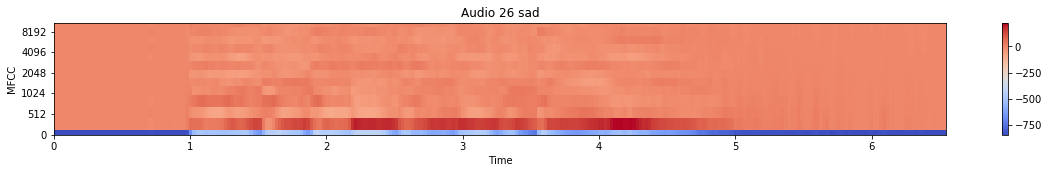

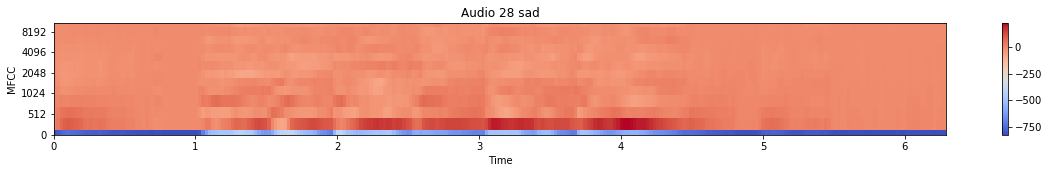

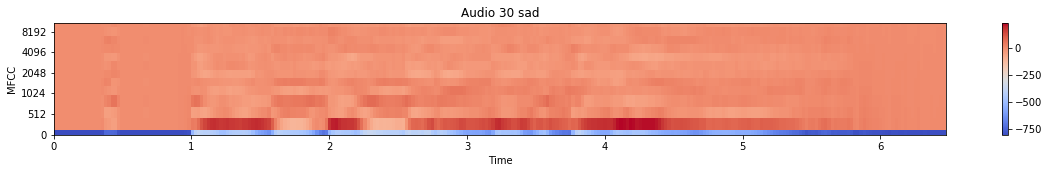

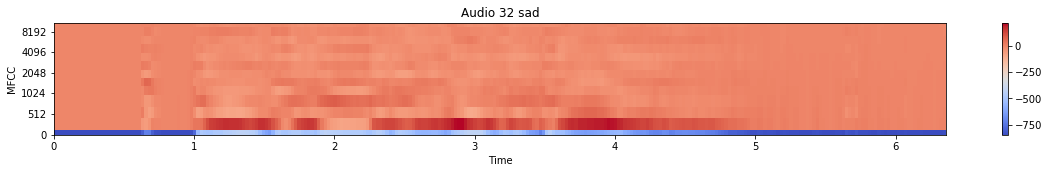

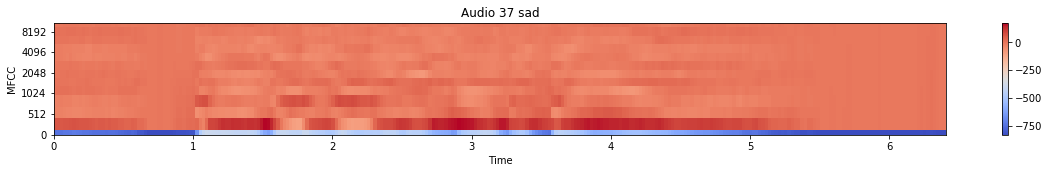

In [6]:
#Look at the MFCC
for index, row in df.iterrows():
    #get sample and path
    X, sample_rate = librosa.load(row['path'], res_type='kaiser_best',sr=22050*2,offset=0.5)

    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

    plt.figure(figsize=(20, 7))
    graph = plt.subplot(3, 1, 1)
    graph.set_title('Audio '+ str(index) + ' ' + row['label'])
    librosa.display.specshow(mfcc, x_axis='time',y_axis='mel')
    plt.ylabel('MFCC')
    plt.colorbar()

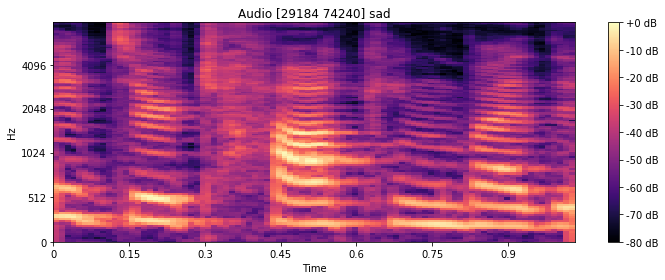

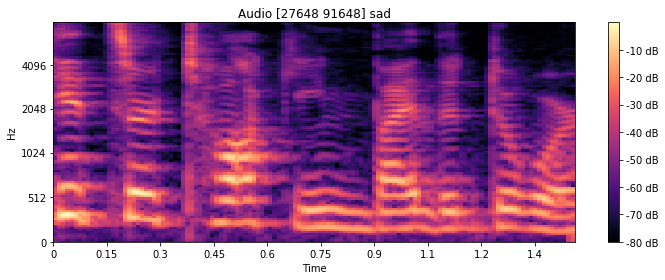

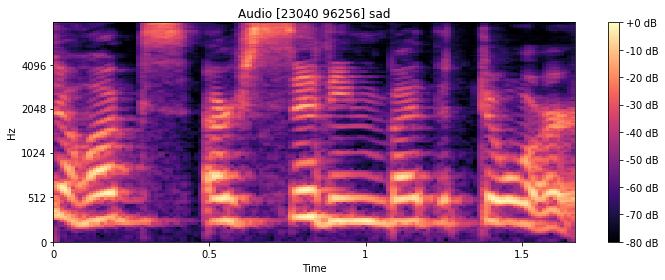

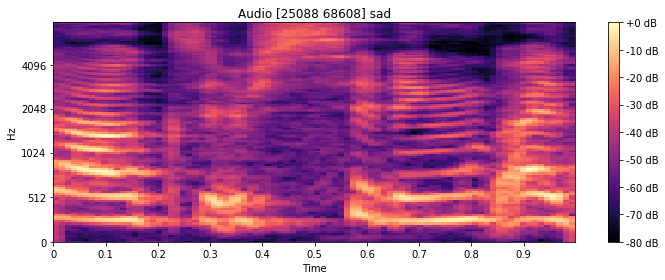

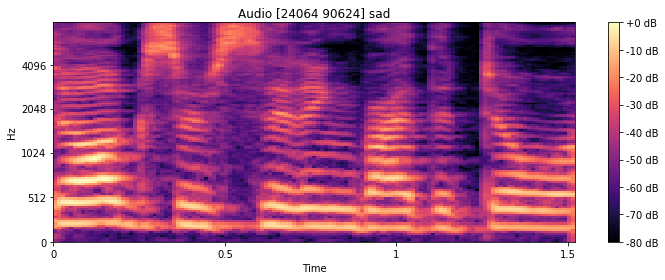

In [7]:
#Look at the Mel Spectrogram

for index, row in df.iterrows():

    y, sample_rate = librosa.load(row['path'], res_type='kaiser_best',sr=22050*2,offset=0.5)
    y, index = librosa.effects.trim(y, top_db=10)

    S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_mels=128, fmax=8000)
    plt.figure(figsize=(10, 4))
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sample_rate,fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Audio '+ str(index) + ' ' + row['label'])
    plt.tight_layout()
    plt.show()

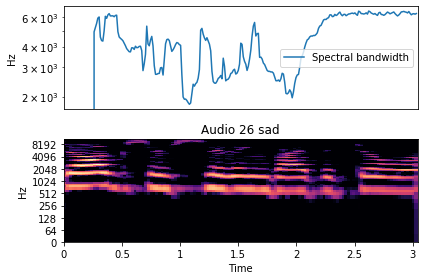

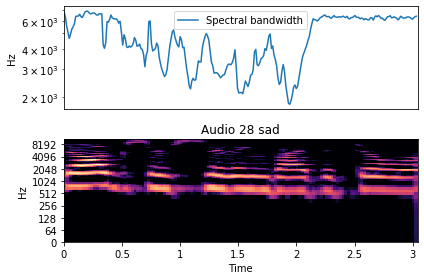

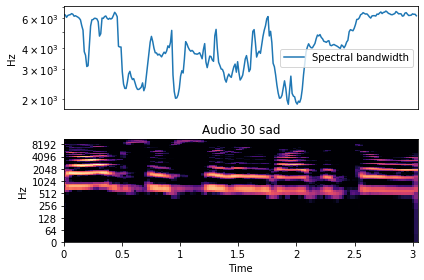

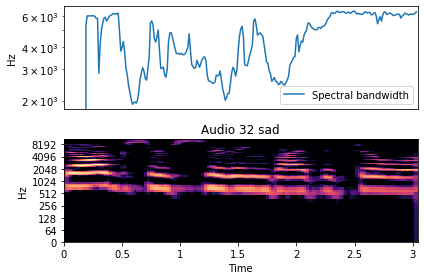

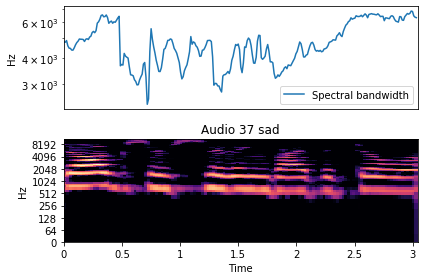

In [8]:
for index, row in df.iterrows():

    y, sample_rate = librosa.load(row['path'], res_type='kaiser_best',sr=22050*2,offset=0.5)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sample_rate)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.semilogy(spec_bw.T, label='Spectral bandwidth')
    plt.ylabel('Hz')
    plt.xticks([])
    plt.xlim([0, spec_bw.shape[-1]])
    plt.legend()
    plt.subplot(2, 1, 2)
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
    plt.title('Audio '+ str(index) + ' ' + row['label'])
    plt.tight_layout()
    plt.show()